### Import Dependencies 

In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

### Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
latest_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date_str = latest_date_query[0]
latest_date = dt.datetime.strptime(latest_date_str, '%Y-%m-%d').date()
print("Latest Date :", latest_date)

Latest Date : 2017-08-23


In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
yr_ago_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Year Ago Date :", yr_ago_date)

Year Ago Date : 2016-08-23


In [66]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and select only the date and prcp values
precip_df=pd.DataFrame(precip_scores,columns=['date','prcp'])

#  set the index to the date column
precip_df=precip_df.set_index('date')

# check and drop null values
precip_df.dropna(axis=0, how="any", inplace=True)
precip_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


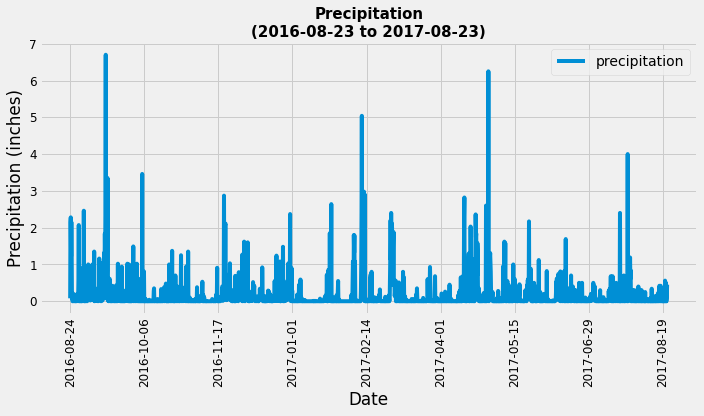

In [69]:
#Rename clolumn
precip_df = precip_df.rename(columns = {"prcp": "precipitation"})

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(10,6), fontsize=12, rot=90)
plt.title(f'Precipitation\n({yr_ago_date} to {latest_date})', fontweight = 'bold', size=15)

# Set labels
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

# Display and Save bar graph to Images folder
plt.tight_layout()
plt.savefig("Images/prcp.png")
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = precip_df.describe()
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
